In [1]:
## San Francisco Housing Rental Analysis

In [2]:
 # initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv

%matplotlib inline

In [3]:
 # Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")

In [4]:
## Load Data

In [5]:
# Read in the census data into a Pandas DataFrame
file_path = Path("../Resources/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

In [6]:
## Housing Units per Year

In [7]:
# Calculate the mean number of housing units per year (hint: use groupby)
housing_units_by_year = (sfo_data.groupby('year')['housing_units'].mean())
print(housing_units_by_year)

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64


In [8]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
housing_units_by_year.hvplot.bar(x='year', y='housing_units', ylim=(372000, 385000)).opts(title="Housing Units in San Francisco from 2010 to 2016", yformatter="%.0f", width=600)

:Bars   [year]   (housing_units)

In [9]:
## Average Prices per Square Foot

In [10]:
# Calculate the average gross rent and average sale price per square foot
avg_gross_rent = (sfo_data.groupby('year')['gross_rent'].mean())
avg_price_sqr_ft = (sfo_data.groupby('year')['sale_price_sqr_foot'].mean())

<AxesSubplot:xlabel='year'>

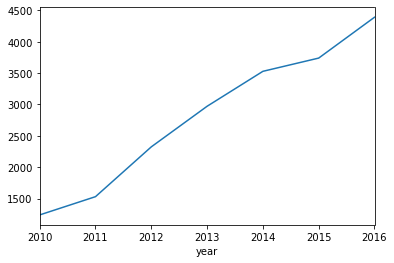

In [11]:
# Plot the Average Gross Rent per Year as a Line Chart 
avg_gross_rent.plot(label='Average Gross Rent San Francisco')

In [12]:
## Average Sales Price per Year

<AxesSubplot:xlabel='year'>

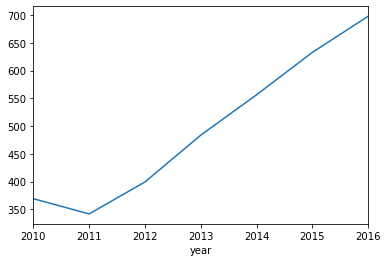

In [13]:
# Plot the Average Sales Price per Year as a line chart
avg_price_sqr_ft.plot()

In [14]:
## Average Prices by Neighborhood

In [17]:
# Group by year and neighborhood and then create a new dataframe of the mean values
neighborhood_df = sfo_data.groupby(['year', 'neighborhood']).mean().reset_index()
neighborhood_df.head(10)

year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
0  2010      Alamo Square           291.182945         372560        1239
1  2010        Anza Vista           267.932583         372560        1239
2  2010           Bayview           170.098665         372560        1239
3  2010  Buena Vista Park           347.394919         372560        1239
4  2010  Central Richmond           319.027623         372560        1239
5  2010    Central Sunset           418.172493         372560        1239
6  2010    Corona Heights           369.359338         372560        1239
7  2010        Cow Hollow           569.379968         372560        1239
8  2010     Croker Amazon           165.645730         372560        1239
9  2010   Diamond Heights           456.930822         372560        1239

In [18]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
neighborhood_df.hvplot(label='Average Price per Square Feet by Year', x='year', y='sale_price_sqr_foot', groupby='neighborhood')

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [19]:
## The Top 10 Most Expensive Neighborhoods

In [20]:
# Getting the data from the top 10 expensive neighborhoods
avg_neighborhood_sale_price = neighborhood_df.drop(columns=['year']).groupby('neighborhood').mean()
top_expensive_neighborhood = avg_neighborhood_sale_price.sort_values("sale_price_sqr_foot", ascending = False).head(10).reset_index()

top_expensive_neighborhood

neighborhood  sale_price_sqr_foot  housing_units   gross_rent
0  Union Square District           903.993258      377427.50  2555.166667
1         Merced Heights           788.844818      380348.00  3414.000000
2          Miraloma Park           779.810842      375967.25  2155.250000
3        Pacific Heights           689.555817      378401.00  2817.285714
4          Westwood Park           687.087575      382295.00  3959.000000
5         Telegraph Hill           676.506578      378401.00  2817.285714
6       Presidio Heights           675.350212      378401.00  2817.285714
7             Cow Hollow           665.964042      378401.00  2817.285714
8           Potrero Hill           662.013613      378401.00  2817.285714
9            South Beach           650.124479      375805.00  2099.000000

In [21]:
# Plotting the data from the top 10 expensive neighborhoods
top_expensive_neighborhood.hvplot.bar(label='Top 10 Expensive Neighborhoods in San Francisco', x='neighborhood', y='sale_price_sqr_foot', width=1000)

:Bars   [neighborhood]   (sale_price_sqr_foot)

In [22]:
## Parallel Coordinates and Parallel Categories Analysis

In [23]:
# Parallel Coordinates plot
px.parallel_coordinates(top_expensive_neighborhood, color="sale_price_sqr_foot", color_continuous_scale=px.colors.sequential.Inferno)

In [24]:
# Parallel Categories Plot
px.parallel_categories(top_expensive_neighborhood, color="sale_price_sqr_foot", color_continuous_scale=px.colors.sequential.Inferno)

In [25]:
## Neighborhood Map

In [26]:
# Load neighborhoods coordinates data
file_path = Path("../Resources/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

Neighborhood        Lat         Lon
0     Alamo Square  37.791012 -122.402100
1       Anza Vista  37.779598 -122.443451
2          Bayview  37.734670 -122.401060
3  Bayview Heights  37.728740 -122.410980
4   Bernal Heights  37.728630 -122.443050

In [27]:
## Data Preparation

In [28]:
# Calculate the mean values for each neighborhood
neighborhood_avg = neighborhood_df.drop(columns=['year']).groupby('neighborhood').mean().reset_index()
neighborhood_avg.head()

neighborhood  sale_price_sqr_foot  housing_units   gross_rent
0     Alamo Square           366.020712       378401.0  2817.285714
1       Anza Vista           373.382198       379050.0  3031.833333
2          Bayview           204.588623       376454.0  2318.400000
3  Bayview Heights           590.792839       382295.0  3739.000000
4  Bernal Heights            576.746488       379374.5  3080.333333

In [29]:
# Join the average values with the neighborhood locations
neighborhood_avg_locations_join = pd.merge(df_neighborhood_locations, neighborhood_avg, how="inner", left_on='Neighborhood', right_on="neighborhood")
neighborhood_avg_locations = neighborhood_avg_locations_join.drop(columns='neighborhood')
neighborhood_avg_locations.head(10)

Neighborhood        Lat         Lon  sale_price_sqr_foot  \
0       Alamo Square  37.791012 -122.402100           366.020712   
1         Anza Vista  37.779598 -122.443451           373.382198   
2            Bayview  37.734670 -122.401060           204.588623   
3    Bayview Heights  37.728740 -122.410980           590.792839   
4   Buena Vista Park  37.768160 -122.439330           452.680591   
5   Central Richmond  37.777890 -122.445170           394.422399   
6     Central Sunset  37.749610 -122.489990           423.687928   
7  Clarendon Heights  37.753310 -122.447030           487.244886   
8     Corona Heights  37.785530 -122.456000           587.539067   
9         Cow Hollow  37.792980 -122.435790           665.964042   

   housing_units   gross_rent  
0       378401.0  2817.285714  
1       379050.0  3031.833333  
2       376454.0  2318.400000  
3       382295.0  3739.000000  
4       378076.5  2698.833333  
5       378401.0  2817.285714  
6       378401.0  2817.285714  
7       376454.0  2250.500000  
8       377232.8  2472.000000  
9       378401.0  2817.285714

In [30]:
from dotenv import load_dotenv
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(mapbox_token)


map = px.scatter_mapbox(
    neighborhood_avg_locations,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="Neighborhood",
    color_continuous_scale=px.colors.sequential.Inferno
)
map.show()